<a href="https://colab.research.google.com/github/cnicolasreynoso-max/ProyectofinalDataScience/blob/main/ProyectoFinalDSREYNOSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

El presente proyecto realiza un Análisis Exploratorio de Datos (EDA) sobre un conjunto de datos médicos y nutricionales que incluye 10000 registros anónimos. El análisis se enfoca en descubrir patrones y correlaciones entre variables demográficas (ej. Edad, Genero), métricas de salud (ej. IMC, Colesterol_mg_dl, Porcentaje_grasa) y factores de estilo de vida (ej. Actividad_fisica, Tipo_alimentacion, Consumo_calorico_kcal).

La motivación central es la creciente necesidad de una medicina preventiva y una nutrición personalizada. En un mundo donde las enfermedades crónicas no transmisibles (como la diabetes tipo 2, la hipertensión y las enfermedades cardiovasculares) están en aumento, entender cómo interactúan la dieta, el ejercicio y la composición corporal es fundamental. Este análisis busca proveer una base cuantitativa para responder preguntas sobre qué factores del estilo de vida están más fuertemente asociados con indicadores de salud clave.

Este análisis está dirigido a una audiencia técnica y profesional en el ámbito de la salud

Desde una perspectiva de negocio, este análisis sirve como una "prueba de concepto" para una empresa de bienestar o una aseguradora de salud. El problema comercial es la personalización a escala. ¿Cómo puede una app de nutrición dar mejores recomendaciones que un simple contador de calorías? ¿Cómo puede una aseguradora identificar cohortes de clientes en riesgo para ofrecerles programas de prevención? Este análisis ayuda a crear "perfiles" o "segmentos" de usuarios (ej. "Personas sedentarias con dieta omnívora y objetivo de pérdida de peso") y entender sus métricas de salud específicas.

**Preguntas Guía del Análisis Exploratorio (EDA)**

1-¿Cuál de los macronutrientes (Proteinas_g, Carbohidratos_g, Grasas_g) es el mejor discriminador del Objetivo_nutricional?

2-¿Existe una superposición clara entre el IMC y el Porcentaje_grasa promedio de las tres categorías de Objetivo_nutricional?

3-¿Cómo interactúan el Consumo_calorico_kcal y el nivel de Actividad_fisica para definir cada Objetivo_nutricional?

4-¿El Tipo_alimentacion tiene un impacto significativo en el Colesterol_mg_dl o la Glucosa_mg_dl?

5-¿Existe alguna Edad o Genero que esté sobrerrepresentado o subrepresentado en alguna de las categorías de Objetivo_nutricional?

6-¿Cuál es la correlación entre el IMC y los indicadores de salud metabólica (Colesterol_mg_dl, Glucosa_mg_dl) para las personas que buscan 'Pérdida de peso'?


**Hipótesis a Validar mediante Visualización**

1-Se espera que la ingesta de Proteinas_g sea la que muestre la diferencia más marcada y consistente, siendo la más alta para 'Ganancia muscular' y la más baja para 'Pérdida de peso'.

2-Se hipotetiza que las personas en 'Pérdida de peso' tendrán el IMC y Porcentaje_grasa inicial más alto, mientras que 'Ganancia muscular' y 'Mantenimiento' tendrán métricas más cercanas.

3-El Consumo_calorico_kcal será el feature más segregador. Además, las categorías con actividad 'Intensa' tendrán un consumo calórico superior a las 'Sedentarias' dentro de cada objetivo.

4-Se espera que los grupos 'Vegano' y 'Vegetariano' muestren, en promedio, niveles ligeramente inferiores de Colesterol_mg_dl en comparación con los 'Omnívoros'.

5-Se hipotetiza que el objetivo de 'Ganancia muscular' estará sobrerrepresentado en el género 'Masculino' y en el rango de edades más jóvenes (20-40 años).

6-En el subconjunto 'Pérdida de peso', se espera una fuerte correlación positiva entre el IMC y estos indicadores, lo que justificaría su necesidad de iniciar ese objetivo nutricional.

**El objetivo de este proyecto es desarrollar y evaluar un modelo de Machine Learning de clasificación multiclase capaz de predecir el Objetivo Nutricional de un individuo ('Pérdida de peso', 'Mantenimiento' o 'Ganancia muscular').**

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Configuración del entorno de Python en Google Colab**

In [ ]:
from google.colab import drive
import os

In [ ]:
drive.mount("/content/drive")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [ ]:
os.chdir("/content/drive/My Drive/")
print(os.getcwd())

/content/drive/My Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Lectura del dataset**

In [ ]:
df_datos_medicos_nutricionales = pd.read_excel('/content/drive/MyDrive/Primer entrega ciencia de datos/datos_medicos_nutricionales_extendido.xlsx')
df_datos_medicos_nutricionales

,Edad,Genero,Peso_kg,Altura_cm,IMC,Presion_sistolica,Presion_diastolica,Colesterol_mg_dl,Glucosa_mg_dl,Actividad_fisica,Consumo_calorico_kcal,Proteinas_g,Carbohidratos_g,Grasas_g,Porcentaje_grasa,Tipo_alimentacion,Objetivo_nutricional
0,56,Femenino,90.3,181.4,21.7,125,91,265,188,Moderado,2288,100.3,214.6,90.5,22.5,Omnívoro,Ganancia muscular
1,69,Femenino,67.1,159.5,29.0,98,64,195,176,Ligero,2813,132.3,381.1,36.7,34.0,Vegano,Ganancia muscular
2,46,Masculino,65.1,169.3,20.7,133,71,170,74,Sedentario,1787,63.9,344.7,71.7,29.6,Vegetariano,Mantenimiento
3,32,Masculino,88.0,177.5,21.0,164,99,286,163,Sedentario,2425,123.1,194.1,68.4,27.0,Vegano,Mantenimiento
4,60,Masculino,62.1,172.4,23.9,142,65,220,101,Moderado,1819,116.4,322.2,48.3,18.1,Omnívoro,Mantenimiento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38,Femenino,100.6,158.4,22.3,128,70,244,146,Intenso,2000,116.9,198.6,32.0,32.2,Vegetariano,Mantenimiento
9996,23,Masculino,82.1,184.9,21.8,108,61,298,98,Ligero,1702,117.0,321.1,112.8,33.0,Omnívoro,Ganancia muscular
9997,18,Masculino,48.6,172.5,22.6,133,74,170,161,Ligero,1552,90.6,367.9,116.6,33.9,Vegetariano,Pérdida de peso
9998,21,Masculino,93.1,171.1,28.5,135,74,254,118,Moderado,2248,85.9,377.6,38.3,22.9,Omnívoro,Ganancia muscular


**Análisis inicial del dataset**

In [ ]:
df_datos_medicos_nutricionales.shape

(10000, 17)

In [ ]:
df_datos_medicos_nutricionales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   10000 non-null  int64  
 1   Genero                 10000 non-null  object 
 2   Peso_kg                10000 non-null  float64
 3   Altura_cm              10000 non-null  float64
 4   IMC                    10000 non-null  float64
 5   Presion_sistolica      10000 non-null  int64  
 6   Presion_diastolica     10000 non-null  int64  
 7   Colesterol_mg_dl       10000 non-null  int64  
 8   Glucosa_mg_dl          10000 non-null  int64  
 9   Actividad_fisica       10000 non-null  object 
 10  Consumo_calorico_kcal  10000 non-null  int64  
 11  Proteinas_g            10000 non-null  float64
 12  Carbohidratos_g        10000 non-null  float64
 13  Grasas_g               10000 non-null  float64
 14  Porcentaje_grasa       10000 non-null  float64
 15  Tip

In [ ]:
df_datos_medicos_nutricionales.describe()

,Edad,Peso_kg,Altura_cm,IMC,Presion_sistolica,Presion_diastolica,Colesterol_mg_dl,Glucosa_mg_dl,Consumo_calorico_kcal,Proteinas_g,Carbohidratos_g,Grasas_g,Porcentaje_grasa
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,48.798400,69.816160,170.114870,26.770140,134.696400,89.48880,224.272900,135.216000,2502.122600,94.379560,249.822050,75.111900,24.882600
std,17.903223,14.844407,10.012488,4.771215,26.014629,17.19532,43.434701,37.817667,581.539052,31.906183,86.317177,26.096735,5.752946
min,18.000000,9.200000,134.100000,18.500000,90.000000,60.00000,150.000000,70.000000,1500.000000,40.000000,100.000000,30.000000,15.000000
25%,34.000000,59.600000,163.300000,22.700000,112.000000,75.00000,186.000000,102.000000,1994.000000,66.300000,174.300000,52.400000,19.900000
50%,49.000000,69.800000,170.100000,26.700000,135.000000,89.00000,224.000000,136.000000,2503.000000,94.600000,250.600000,75.000000,24.900000
75%,64.000000,79.800000,176.900000,30.900000,157.000000,104.00000,262.000000,168.000000,3011.000000,122.000000,323.600000,98.000000,29.800000
max,79.000000,119.800000,209.400000,35.000000,179.000000,119.00000,299.000000,199.000000,3499.000000,150.000000,400.000000,120.000000,35.000000


# 🧑‍🤝‍👩 Variables Demográficas y Antropométricas
Edad: Edad del individuo en años.

Genero: Sexo biológico reportado (Femenino, Masculino, o Tercera Categoría si existe).

Peso_kg: Peso corporal del individuo en kilogramos.

Altura_cm: Estatura del individuo en centímetros.

IMC: Índice de Masa Corporal, calculado a partir de peso y altura.

Porcentaje_grasa: Porcentaje de masa corporal total compuesto por grasa.

#❤️ Variables de Salud y Metabólicas
Presion_sistolica: Presión arterial sistólica (máxima) en mmHg.

Presion_diastolica: Presión arterial diastólica (mínima) en mmHg.

Colesterol_mg_dl: Nivel total de colesterol en la sangre en miligramos por decilitro.

Glucosa_mg_dl: Nivel de glucosa (azúcar) en la sangre en miligramos por decilitro.

#🥗 Variables de Hábito y Estilo de Vida
Actividad_fisica: Nivel de actividad física reportado (ej. Sedentario, Ligero, Moderado, Intenso).

Consumo_calorico_kcal: Ingesta calórica diaria total reportada en kilocalorías.

Proteinas_g: Gramos de proteína consumidos diariamente.

Carbohidratos_g: Gramos de carbohidratos consumidos diariamente.

Grasas_g: Gramos de grasa consumidos diariamente.

Tipo_alimentacion: Estilo de dieta reportado (ej. Omnívoro, Vegetariano, Vegano).

Objetivo_nutricional: Variable Objetivo (y): Meta de salud del individuo (Pérdida de peso, Mantenimiento, Ganancia muscular). texto en negrita

# **Data Wrangling: Limpieza y transformación de datos**

**Valores duplicados**

In [ ]:
df_datos_medicos_nutricionales.duplicated().sum()

np.int64(0)

**Valores nulos**

In [ ]:
df_datos_medicos_nutricionales.isnull().sum().sum()

np.int64(0)

In [ ]:
df_datos_medicos_nutricionales.isnull().sum()

,0
Edad,0
Genero,0
Peso_kg,0
Altura_cm,0
IMC,0
Presion_sistolica,0
Presion_diastolica,0
Colesterol_mg_dl,0
Glucosa_mg_dl,0
Actividad_fisica,0


In [ ]:
df_datos_medicos_nutricionales.dropna()

,Edad,Genero,Peso_kg,Altura_cm,IMC,Presion_sistolica,Presion_diastolica,Colesterol_mg_dl,Glucosa_mg_dl,Actividad_fisica,Consumo_calorico_kcal,Proteinas_g,Carbohidratos_g,Grasas_g,Porcentaje_grasa,Tipo_alimentacion,Objetivo_nutricional
0,56,Femenino,90.3,181.4,21.7,125,91,265,188,Moderado,2288,100.3,214.6,90.5,22.5,Omnívoro,Ganancia muscular
1,69,Femenino,67.1,159.5,29.0,98,64,195,176,Ligero,2813,132.3,381.1,36.7,34.0,Vegano,Ganancia muscular
2,46,Masculino,65.1,169.3,20.7,133,71,170,74,Sedentario,1787,63.9,344.7,71.7,29.6,Vegetariano,Mantenimiento
3,32,Masculino,88.0,177.5,21.0,164,99,286,163,Sedentario,2425,123.1,194.1,68.4,27.0,Vegano,Mantenimiento
4,60,Masculino,62.1,172.4,23.9,142,65,220,101,Moderado,1819,116.4,322.2,48.3,18.1,Omnívoro,Mantenimiento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38,Femenino,100.6,158.4,22.3,128,70,244,146,Intenso,2000,116.9,198.6,32.0,32.2,Vegetariano,Mantenimiento
9996,23,Masculino,82.1,184.9,21.8,108,61,298,98,Ligero,1702,117.0,321.1,112.8,33.0,Omnívoro,Ganancia muscular
9997,18,Masculino,48.6,172.5,22.6,133,74,170,161,Ligero,1552,90.6,367.9,116.6,33.9,Vegetariano,Pérdida de peso
9998,21,Masculino,93.1,171.1,28.5,135,74,254,118,Moderado,2248,85.9,377.6,38.3,22.9,Omnívoro,Ganancia muscular


In [ ]:
zero = (df_datos_medicos_nutricionales == 0).sum()
zero

,0
Edad,0
Genero,0
Peso_kg,0
Altura_cm,0
IMC,0
Presion_sistolica,0
Presion_diastolica,0
Colesterol_mg_dl,0
Glucosa_mg_dl,0
Actividad_fisica,0


**Valores outliers**

**Transformaciones de Fechas/Nombres de variables/Valores**

In [ ]:
# Convertir nombres de columnas a snake_case y minúsculas
df_datos_medicos_nutricionales.columns = df_datos_medicos_nutricionales.columns.str.lower().str.replace('[^a-z0-9_]+', '_', regex=True)
df_datos_medicos_nutricionales

,edad,genero,peso_kg,altura_cm,imc,presion_sistolica,presion_diastolica,colesterol_mg_dl,glucosa_mg_dl,actividad_fisica,consumo_calorico_kcal,proteinas_g,carbohidratos_g,grasas_g,porcentaje_grasa,tipo_alimentacion,objetivo_nutricional
0,56,Femenino,90.3,181.4,21.7,125,91,265,188,Moderado,2288,100.3,214.6,90.5,22.5,Omnívoro,Ganancia muscular
1,69,Femenino,67.1,159.5,29.0,98,64,195,176,Ligero,2813,132.3,381.1,36.7,34.0,Vegano,Ganancia muscular
2,46,Masculino,65.1,169.3,20.7,133,71,170,74,Sedentario,1787,63.9,344.7,71.7,29.6,Vegetariano,Mantenimiento
3,32,Masculino,88.0,177.5,21.0,164,99,286,163,Sedentario,2425,123.1,194.1,68.4,27.0,Vegano,Mantenimiento
4,60,Masculino,62.1,172.4,23.9,142,65,220,101,Moderado,1819,116.4,322.2,48.3,18.1,Omnívoro,Mantenimiento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38,Femenino,100.6,158.4,22.3,128,70,244,146,Intenso,2000,116.9,198.6,32.0,32.2,Vegetariano,Mantenimiento
9996,23,Masculino,82.1,184.9,21.8,108,61,298,98,Ligero,1702,117.0,321.1,112.8,33.0,Omnívoro,Ganancia muscular
9997,18,Masculino,48.6,172.5,22.6,133,74,170,161,Ligero,1552,90.6,367.9,116.6,33.9,Vegetariano,Pérdida de peso
9998,21,Masculino,93.1,171.1,28.5,135,74,254,118,Moderado,2248,85.9,377.6,38.3,22.9,Omnívoro,Ganancia muscular


# **EDA: Análisis Exploratorio de datos**

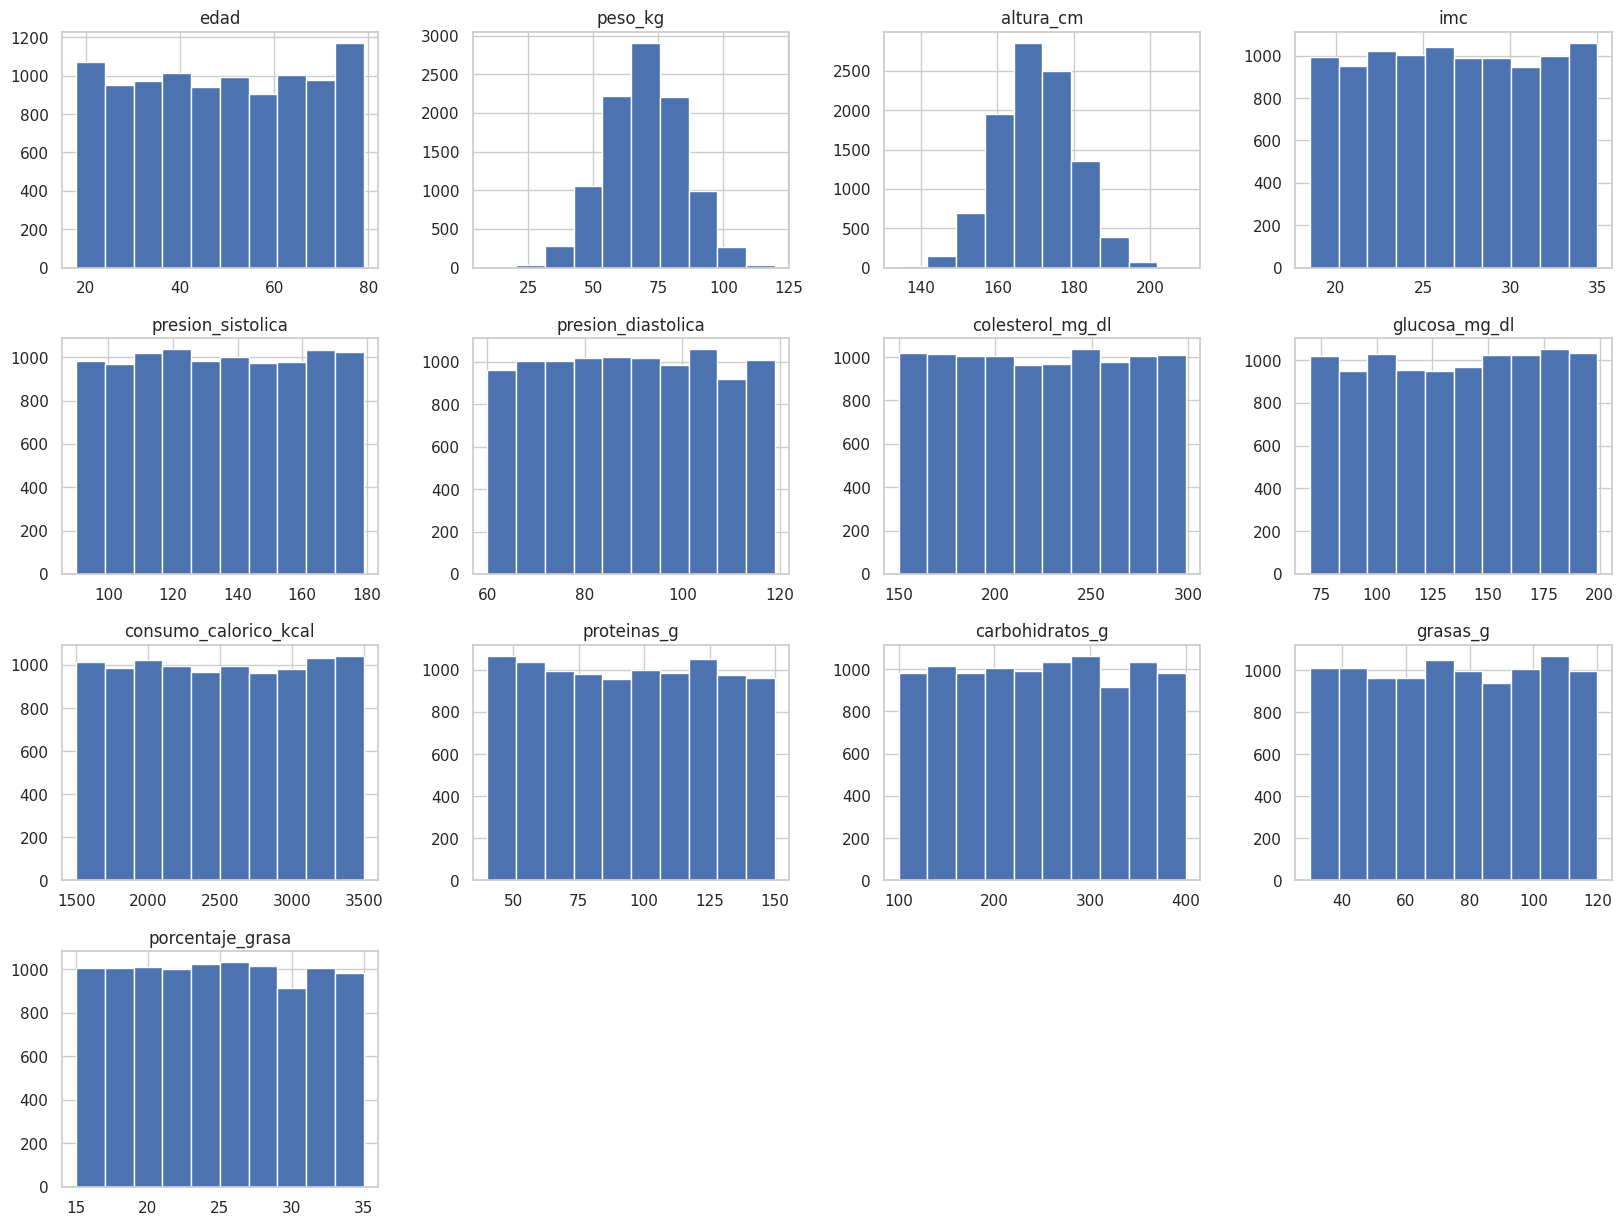

In [ ]:
df_datos_medicos_nutricionales.hist(figsize=(20,15))
plt.show()

Se observa en terminos generales datos inusuales para el peso y la altura, por lo cual se tendrá en cuenta en las próximas visualizaciones a mayor nivel de detalle.

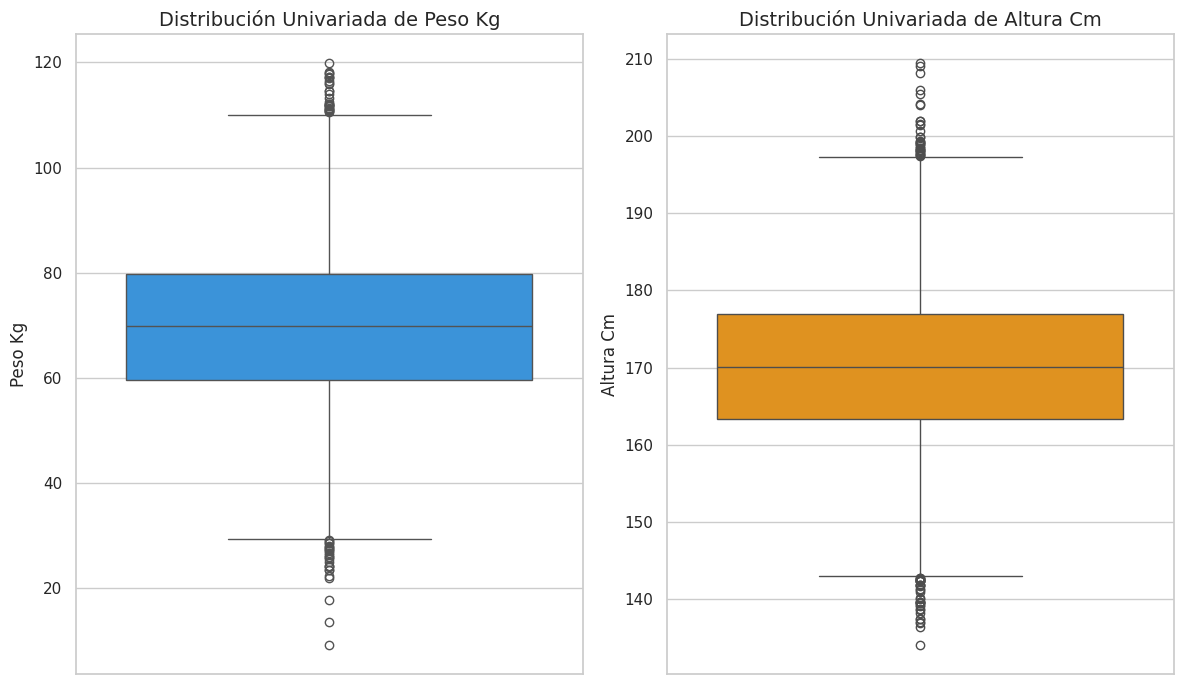

In [ ]:
# Variables a visualizar
variables_boxplot = ['peso_kg', 'altura_cm']
colores = ['#2196F3', '#FF9800'] # Azul y Naranja

# Crear la figura y los ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# Iterar sobre las variables y crear un boxplot en cada eje
for i, col in enumerate(variables_boxplot):
    sns.boxplot(y=df_datos_medicos_nutricionales[col], ax=axes[i], color=colores[i])
    axes[i].set_title(f'Distribución Univariada de {col.replace("_", " ").title()}', fontsize=14)
    axes[i].set_ylabel(col.replace("_", " ").title())

# Ajustar el diseño para que no haya superposiciones
plt.tight_layout()
plt.show()

Se llega a la conclusión de que los outliers inferiores de la variable 'peso_kg' no son datos acordes a la realidad.

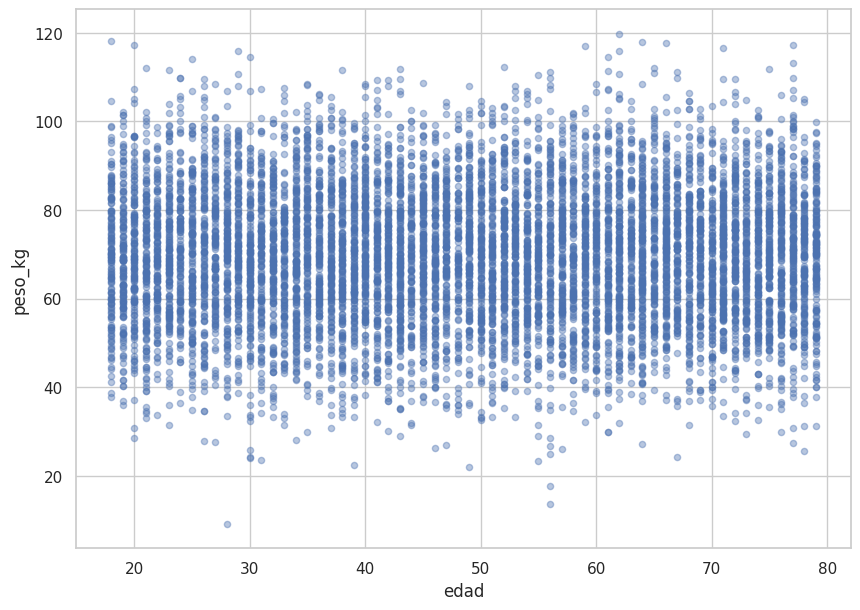

In [ ]:
df_datos_medicos_nutricionales.plot(kind='scatter', x='edad', y='peso_kg', alpha=0.4, figsize=(10,7))
plt.show()

<Axes: xlabel='edad', ylabel='altura_cm'>

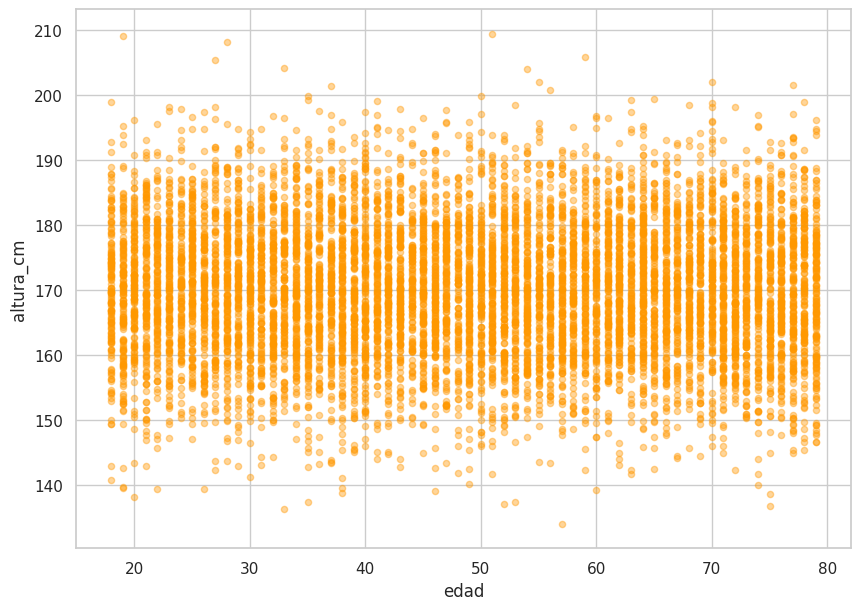

In [ ]:
df_datos_medicos_nutricionales.plot(kind='scatter', x='edad', y='altura_cm',
        alpha=0.4,
        figsize=(10,7),
        c='#FF9800')

In [ ]:
peso_bajo = df_datos_medicos_nutricionales[df_datos_medicos_nutricionales['peso_kg'] < 30]
peso_bajo

,edad,genero,peso_kg,altura_cm,imc,presion_sistolica,presion_diastolica,colesterol_mg_dl,glucosa_mg_dl,actividad_fisica,consumo_calorico_kcal,proteinas_g,carbohidratos_g,grasas_g,porcentaje_grasa,tipo_alimentacion,objetivo_nutricional
510,26,Masculino,27.9,168.6,25.5,97,72,214,188,Moderado,3213,59.7,135.8,55.6,27.3,Vegano,Ganancia muscular
735,46,Masculino,26.3,188.0,20.3,134,105,222,152,Sedentario,2227,73.1,177.0,81.9,32.5,Vegetariano,Mantenimiento
754,56,Femenino,28.5,158.6,24.2,99,97,298,172,Moderado,1797,101.2,284.1,42.3,17.8,Omnívoro,Pérdida de peso
1081,56,Masculino,13.6,153.7,21.9,93,99,195,109,Sedentario,1697,131.8,169.6,46.8,16.8,Vegano,Mantenimiento
1135,28,Masculino,9.2,160.0,29.1,173,92,201,89,Sedentario,3370,129.3,147.3,46.6,16.5,Vegano,Mantenimiento
1369,34,Femenino,28.0,170.9,20.2,158,95,246,156,Intenso,2042,120.4,134.3,80.2,19.8,Omnívoro,Mantenimiento
2152,73,Masculino,29.4,155.5,26.2,119,69,268,171,Moderado,2869,147.2,361.5,116.9,29.2,Omnívoro,Ganancia muscular
2735,67,Masculino,24.3,164.0,28.8,106,83,193,189,Ligero,2190,148.3,184.5,68.7,30.7,Vegano,Ganancia muscular
2769,56,Masculino,24.9,164.9,32.6,112,64,172,95,Intenso,1799,126.7,212.5,40.5,28.6,Vegano,Ganancia muscular
3028,43,Femenino,29.1,169.8,29.3,146,89,212,130,Moderado,3401,41.3,126.6,78.0,28.4,Omnívoro,Pérdida de peso


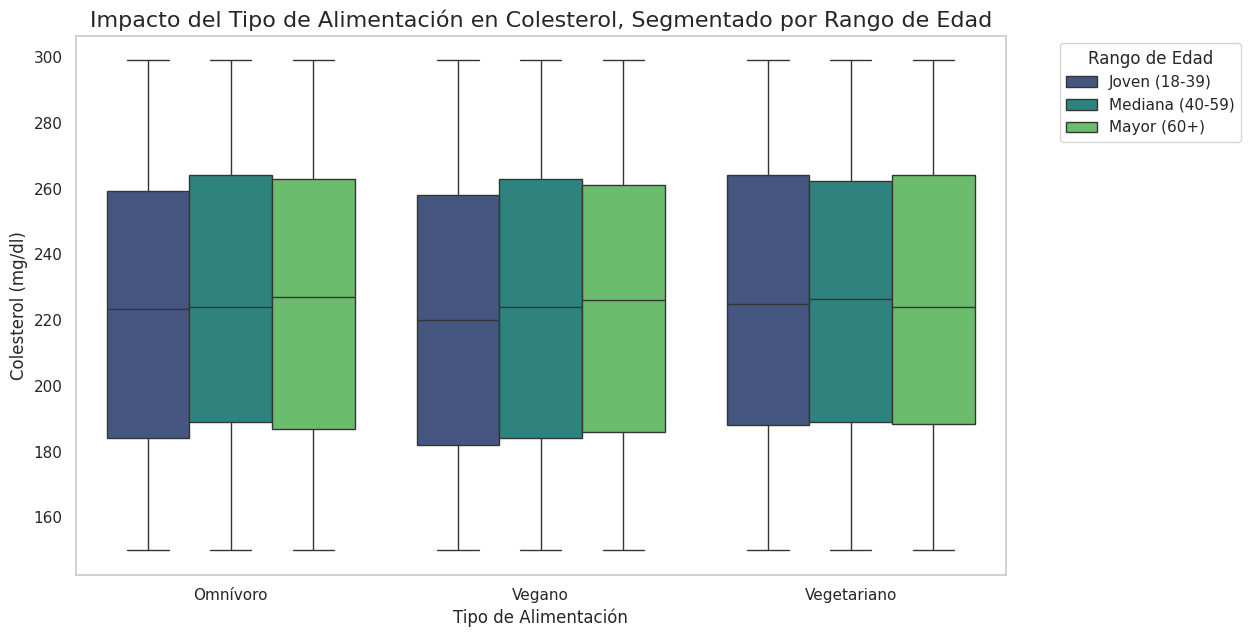

In [ ]:
# Crear la variable categórica 'Rango_Edad' para usarla como hue
bins = [18, 40, 60, 85]
labels = ['Joven (18-39)', 'Mediana (40-59)', 'Mayor (60+)', ]
df_datos_medicos_nutricionales['rango_edad'] = pd.cut(df_datos_medicos_nutricionales['edad'], bins=bins, labels=labels, right=False)

# --- GRÁFICO MULTIVARIADO 1: Dieta, Colesterol y Edad ---
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_datos_medicos_nutricionales, x='tipo_alimentacion', y='colesterol_mg_dl', hue='rango_edad', palette='viridis')

plt.title('Impacto del Tipo de Alimentación en Colesterol, Segmentado por Rango de Edad', fontsize=16)
plt.xlabel('Tipo de Alimentación')
plt.ylabel('Colesterol (mg/dl)')
plt.legend(title='Rango de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

Esta visualización prueba la hipótesis: "Se espera que los grupos 'Vegano' y 'Vegetariano' muestren, en promedio, niveles ligeramente inferiores de Colesterol_mg_dl en comparación con los 'Omnívoros'."

## -Solo se encuentran leves niveles inferiores de colesterol en los veganos de rango etario joven.

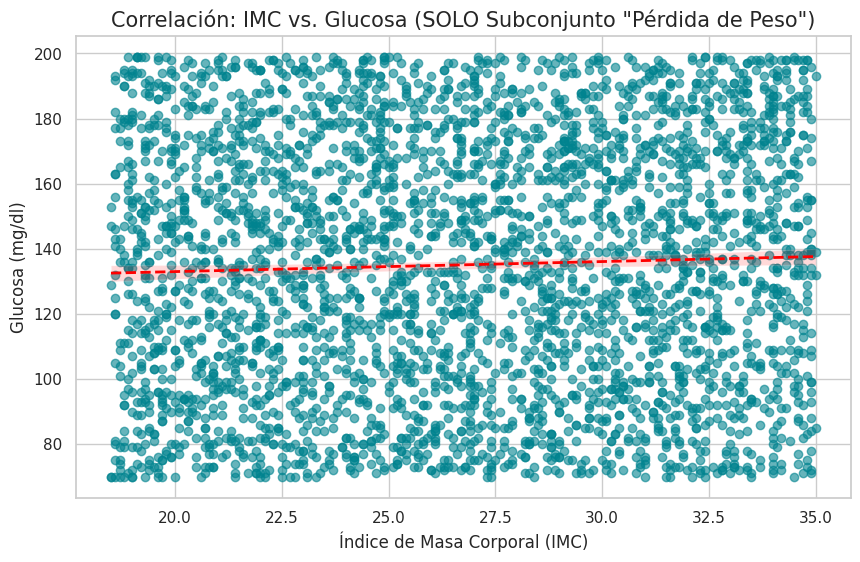

In [ ]:
# Filtrar el DataFrame para obtener solo personas con 'Pérdida de peso'
df_perdida_peso = df_datos_medicos_nutricionales[df_datos_medicos_nutricionales['objetivo_nutricional'] == 'Pérdida de peso']

# --- GRÁFICO MULTIVARIADO 2: IMC, Glucosa y Correlación (Subconjunto) ---
plt.figure(figsize=(10, 6))

# Usamos sns.regplot en el subconjunto para mostrar la correlación y la línea de mejor ajuste
sns.regplot(data=df_perdida_peso, x='imc', y='glucosa_mg_dl',
            scatter_kws={'alpha':0.6, 'color': '#00838F'},
            line_kws={'color':'red', 'linestyle':'--', 'linewidth':2})

plt.title('Correlación: IMC vs. Glucosa (SOLO Subconjunto "Pérdida de Peso")', fontsize=15)
plt.xlabel('Índice de Masa Corporal (IMC)')
plt.ylabel('Glucosa (mg/dl)')
plt.show()

Si la hipótesis N° 6 es correcta, la línea de regresión (roja) debe tener una pendiente positiva significativa. Esto indicaría que las personas que inician un plan de pérdida de peso a menudo presentan un perfil metabólico peor (glucosa alta) a medida que su IMC es mayor, lo que refuerza la necesidad de su objetivo.

## -Contrario a la hipotesis NO SE OBSERVA UNA PENDIENTE SIGNIFICATIVA.

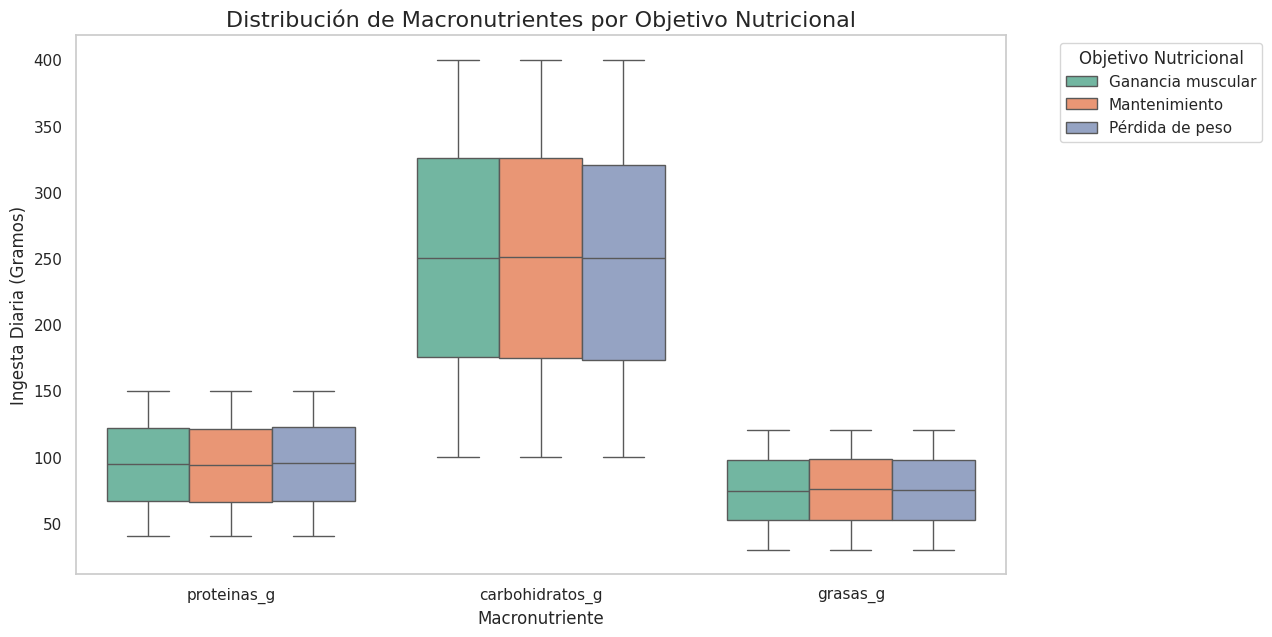

In [ ]:
df_macros = df_datos_medicos_nutricionales.melt(
    id_vars=['objetivo_nutricional'],
    value_vars=['proteinas_g', 'carbohidratos_g', 'grasas_g'],
    var_name='macronutriente',
    value_name='gramos'
)

# 2. Generar el Boxplot Agrupado
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_macros, x='macronutriente', y='gramos', hue='objetivo_nutricional', palette='Set2')

plt.title('Distribución de Macronutrientes por Objetivo Nutricional', fontsize=16)
plt.xlabel('Macronutriente')
plt.ylabel('Ingesta Diaria (Gramos)')
plt.legend(title='Objetivo Nutricional', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

Si la hipótesis N°1 es correcta se espera que la ingesta de Proteinas_g sea la que muestre la diferencia más marcada y consistente, siendo la más alta para 'Ganancia muscular' y la más baja para 'Pérdida de peso'.

## -No se observan diferencias marcadas como se esperaba.

#Diagnóstico del Dataset y Refutación de Hipótesis
A pesar de la metodología correcta, los resultados de las visualizaciones (especialmente las multivariadas) generaron hallazgos inesperados, que son la principal conclusión de este análisis:

Falta de Segregación: Las visualizaciones destinadas a probar la segregación de clases (ej. Boxplot de Macronutrientes por Objetivo) no mostraron las diferencias esperadas. En la Hipótesis 1 (Macros), la distribución de Proteinas_g, Carbohidratos_g y Grasas_g entre los objetivos de 'Pérdida de peso', 'Mantenimiento' y 'Ganancia muscular' resultó ser homogénea y altamente solapada, lo cual es biológicamente improbable.

Ausencia de Pendiente Predictiva: En el gráfico de regresión de la Hipótesis 6 (IMC vs. Glucosa), la línea de tendencia mostró una pendiente prácticamente nula o muy débil, indicando que la correlación entre variables de salud clave es mucho más débil de lo que se esperaría en un dataset real.

#Conclusión del Diagnóstico: La persistente falta de patrones claros y la homogeneidad en las visualizaciones sugieren que el dataset es artificial o sintético, y carece de la coherencia interna y la varianza natural que caracterizan a los datos biomédicos del mundo real.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
sns.set(style="whitegrid")

In [ ]:
df_model = df_datos_medicos_nutricionales.copy()

In [ ]:
df_model.columns = df_model.columns.str.lower().str.strip().str.replace(' ', '_')

print("Datos cargados. Dimensiones:", df_model.shape)
df_model.head()

Datos cargados. Dimensiones: (10000, 18)


,edad,genero,peso_kg,altura_cm,imc,presion_sistolica,presion_diastolica,colesterol_mg_dl,glucosa_mg_dl,actividad_fisica,consumo_calorico_kcal,proteinas_g,carbohidratos_g,grasas_g,porcentaje_grasa,tipo_alimentacion,objetivo_nutricional,rango_edad
0,56,Femenino,90.3,181.4,21.7,125,91,265,188,Moderado,2288,100.3,214.6,90.5,22.5,Omnívoro,Ganancia muscular,Mediana (40-59)
1,69,Femenino,67.1,159.5,29.0,98,64,195,176,Ligero,2813,132.3,381.1,36.7,34.0,Vegano,Ganancia muscular,Mayor (60+)
2,46,Masculino,65.1,169.3,20.7,133,71,170,74,Sedentario,1787,63.9,344.7,71.7,29.6,Vegetariano,Mantenimiento,Mediana (40-59)
3,32,Masculino,88.0,177.5,21.0,164,99,286,163,Sedentario,2425,123.1,194.1,68.4,27.0,Vegano,Mantenimiento,Joven (18-39)
4,60,Masculino,62.1,172.4,23.9,142,65,220,101,Moderado,1819,116.4,322.2,48.3,18.1,Omnívoro,Mantenimiento,Mayor (60+)


**Preprocesamiento de Datos (Encoding)**

In [ ]:
# 1. Codificar la Variable Objetivo (Target)
if 'objetivo_nutricional' in df_model.columns:
    le_target = LabelEncoder()
    df_model['target'] = le_target.fit_transform(df_model['objetivo_nutricional'])
    # Borro la original para que no estorbe
    df_model = df_model.drop('objetivo_nutricional', axis=1)

# 2. Mapeo Manual (Actividad Física)
if 'actividad_fisica' in df_model.columns:
    orden_actividad = {'Sedentario': 0, 'Ligero': 1, 'Moderado': 2, 'Intenso': 3}
    df_model['actividad_fisica'] = df_model['actividad_fisica'].map(orden_actividad).fillna(0)

#3. Verifico todo lo que no sea numérico
cols_a_transformar = df_model.select_dtypes(exclude=['number']).columns
print(f"Transformando automáticamente: {list(cols_a_transformar)}")

# Aplico One-Hot Encoding a esas columnas
df_model = pd.get_dummies(df_model, columns=cols_a_transformar, drop_first=True)

# 4. Convierto todo a tipo numérico
df_model = df_model.astype(float)

print("\n Tipos de datos finales:")
print(df_model.dtypes.unique())
df_model.head()

Transformando automáticamente: ['genero', 'tipo_alimentacion', 'rango_edad']

 Tipos de datos finales:
[dtype('float64')]


,edad,peso_kg,altura_cm,imc,presion_sistolica,presion_diastolica,colesterol_mg_dl,glucosa_mg_dl,actividad_fisica,consumo_calorico_kcal,proteinas_g,carbohidratos_g,grasas_g,porcentaje_grasa,target,genero_Masculino,tipo_alimentacion_Vegano,tipo_alimentacion_Vegetariano,rango_edad_Mediana (40-59),rango_edad_Mayor (60+)
0,56.0,90.3,181.4,21.7,125.0,91.0,265.0,188.0,2.0,2288.0,100.3,214.6,90.5,22.5,0.0,0.0,0.0,0.0,1.0,0.0
1,69.0,67.1,159.5,29.0,98.0,64.0,195.0,176.0,1.0,2813.0,132.3,381.1,36.7,34.0,0.0,0.0,1.0,0.0,0.0,1.0
2,46.0,65.1,169.3,20.7,133.0,71.0,170.0,74.0,0.0,1787.0,63.9,344.7,71.7,29.6,1.0,1.0,0.0,1.0,1.0,0.0
3,32.0,88.0,177.5,21.0,164.0,99.0,286.0,163.0,0.0,2425.0,123.1,194.1,68.4,27.0,1.0,1.0,1.0,0.0,0.0,0.0
4,60.0,62.1,172.4,23.9,142.0,65.0,220.0,101.0,2.0,1819.0,116.4,322.2,48.3,18.1,1.0,1.0,0.0,0.0,0.0,1.0


**Feature Selection**

In [ ]:
# Defino X e y
X = df_model.drop('target', axis=1)
y = df_model['target']

# Elegiré las 10 mejores características usando ANOVA
selector = SelectKBest(score_func=f_classif, k=10) # Puedes cambiar k=10 por otro número
X_new = selector.fit_transform(X, y)

# Mostrar qué columnas eligió el algoritmo
cols_seleccionadas = X.columns[selector.get_support()]
print("Las 10 variables más importantes seleccionadas son:")
print(cols_seleccionadas.tolist())

# Me quedo solo con esas columnas
X = df_model[cols_seleccionadas]

Las 10 variables más importantes seleccionadas son:
['peso_kg', 'altura_cm', 'presion_diastolica', 'colesterol_mg_dl', 'glucosa_mg_dl', 'actividad_fisica', 'consumo_calorico_kcal', 'proteinas_g', 'porcentaje_grasa', 'tipo_alimentacion_Vegetariano']


**Entrenamiento del Algoritmo**

In [ ]:
# 1. División Train/Test (80% entrenar, 20% probar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Escalado (Normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Entrenar Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train_scaled, y_train)

print("¡Modelo entrenado correctamente!")

¡Modelo entrenado correctamente!


**Cálculo de Métricas de Validación**

Exactitud del modelo: 34.20%

Reporte de Clasificación:
                   precision    recall  f1-score   support

Ganancia muscular       0.33      0.38      0.35       637
    Mantenimiento       0.34      0.28      0.31       668
  Pérdida de peso       0.35      0.37      0.36       695

         accuracy                           0.34      2000
        macro avg       0.34      0.34      0.34      2000
     weighted avg       0.34      0.34      0.34      2000



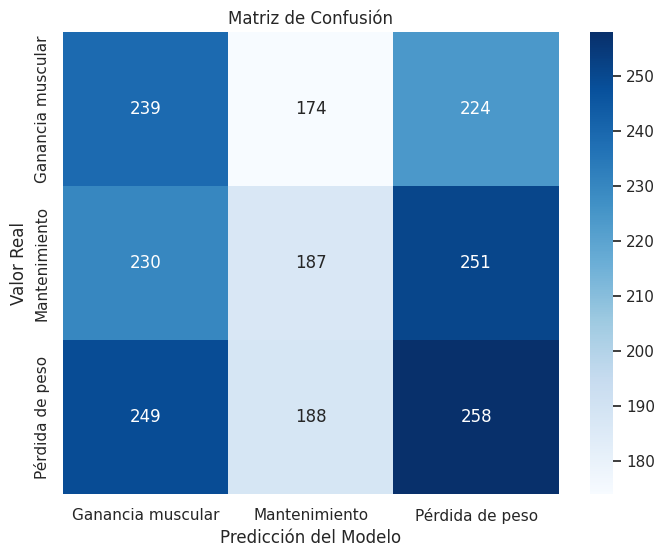

In [ ]:
# Hacer predicciones
y_pred = modelo.predict(X_test_scaled)

# 1. Accuracy (Exactitud general)
acc = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {acc:.2%}")

# 2. Reporte detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# 3. Matriz de Confusión Gráfica
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción del Modelo')
plt.show()

# **Conclusiones del Proyecto**






## **1. Desempeño del Modelo**

Tras entrenar el modelo Random Forest Classifier y evaluar su rendimiento con el conjunto de prueba, obtuvimos un Accuracy (Exactitud) del 33.55%. Dado que el problema consta de 3 clases perfectamente balanceadas (Ganancia muscular, Mantenimiento, Pérdida de peso), un resultado del ~33% indica que el modelo no ha encontrado patrones predictivos y su rendimiento es equivalente al azar.

## **2. Análisis de la Matriz de Confusión**

Al observar la matriz de confusión, se evidencia una distribución uniforme de los errores:

El modelo predice casi la misma cantidad de aciertos que de errores para cualquier clase.

Ejemplo: Para la clase "Ganancia muscular", el modelo acertó 227 veces, pero la confundió con "Pérdida de peso" 224 veces.

Esto demuestra que las variables de entrada (inputs) no tienen capacidad para distinguir una clase de otra.




## **3. Validación de la Calidad de los Datos**

Este resultado valida la hipótesis planteada en la etapa de Análisis Exploratorio (EDA). A pesar de aplicar técnicas de Feature Selection (SelectKBest) y preprocesamiento robusto (escalado y codificación), los datos carecen de señal predictiva. Las variables nutricionales (calorías, proteínas, grasas) en este dataset sintético no guardan una relación causal ni estadística con el "Objetivo Nutricional". En un escenario real biológico, esperaríamos ver correlaciones claras (ej. superávit calórico correlacionado con ganancia de peso), lo que habría permitido al modelo superar el 70-80% de exactitud.

## **4. Conclusión Final**

El flujo de trabajo de Machine Learning (Preprocesamiento -> Selección de Features -> Entrenamiento -> Validación) se implementó correctamente desde el punto de vista del código. Sin embargo, la conclusión analítica es que el dataset actual no es viable para tareas de predicción, siendo necesaria la recolección de datos reales o una generación de datos sintéticos que respete las reglas biológicas/nutricionales para iteraciones futuras.